<a href="https://colab.research.google.com/github/calvinaberg1/dsci-101-final-project/blob/main/final_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DSCI 101: NBA Youngboys Basketball Analysis Final Notebook

### Comments and Grade: A (95/100) ###
- Highlights:
  - Notebook is well organized with meaningful sections and texts to explain your project. 
Great job in all data visualizations with color coding win%. 
  - You have included interpretation for each plot!
  - You standardize your data before PCA and K-means, which is good practice. Particularly for PCA, if some of the variables are on completely different scales, they should be standardized! In particular some of your columns are in fraction while others are in percentages. 
  - For your linear regression model, you have included the correct interpretation of the coefficients.
  - You tried a series of models and showed improvement in performance!
  - Codes are sufficiently documented and readable. 



## Standard Imports, Reading Data In

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True

import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
total_nba = pd.read_csv("/content/drive/Shareddrives/DSCI101Fa21Team1/nba_real")

In [ ]:
print(total_nba.shape)
total_nba.head()

(1226, 19)


,Unnamed: 0,Team,Age,W,L,ORtg,DRtg,NRtg,Pace,TS%,Year,eFG%,TOV%,FT/FGA,TS%.1,3PAr,ORB%,DRB%,W%
0,1,Denver Nuggets*,27.3,50.0,32.0,100.7,96.1,4.6,111.2,0.531,1976.0,0.481,18.8,0.275,0.531,NaN,34.2,68.0,0.609756
1,2,Philadelphia 76ers*,25.6,50.0,32.0,101.2,97.6,3.6,108.3,0.530,1976.0,0.480,18.3,0.275,0.530,NaN,34.6,66.0,0.609756
2,3,Golden State Warriors*,25.8,46.0,36.0,102.4,99.5,2.9,107.8,0.518,1976.0,0.475,15.6,0.211,0.518,NaN,33.0,67.8,0.560976
3,4,Los Angeles Lakers*,27.2,53.0,29.0,101.4,98.9,2.5,104.7,0.515,1976.0,0.478,15.3,0.188,0.515,NaN,31.0,66.1,0.646341
4,5,Houston Rockets*,25.8,49.0,33.0,104.5,102.9,1.6,101.3,0.529,1976.0,0.483,16.2,0.226,0.529,NaN,36.0,70.1,0.597561


## Introduction and Background

Our team, the NBA Youngboys is full of students with a genuine passion and love for the game of basketball. We are all students who have grown up playing sports and have loved the competition so much that we chose to major in sports management in college. 

Basketball in particular is a game that we all share a love for and we constantly seek to understand and know better. Along these lines, we wanted to create this project in order to 1) better understand the factors that contribute to success in NBA basketball and 2) create the most precise predictive model for NBA success possible.

The dataset that we used in order to do this is a compilation of advanced statistics that we gathered from Basketball Reference - a free basketball statistics website. The statistics are considered advanced because they require some degree of calculation and they can't be directly observed from a basketball game box score. 

The problems that we are attempting to dig into are the ever-present issue and question for NBA teams: what makes a team more successful? and the ever-present question for avid NBA fans such as ourselves: will my team be any good this year? We hope that this project can take a look at both of these questions and possibly provide some degree of an answer. 

The reprocussions for providing these answers and examining these questions are not small issues. NBA teams spend millions of dollars attempting to aquire talent that will help their team get a marginal leg-up on opponents based on which statistics they believe will most contribute to their success. Just last year, Warriors point gaurd Steph Curry was signed to a 4-year contract worth $215 million because, among other things, he is one of the most effective high-volume shooters the league has ever seen - a statistic that we'll attempt to show has extremely high correlation to success. 

The mission of attempting success is one of no small consequences as well. Models that predict winning to low enough error rule the world of sports betting, an idustry that is predicted to grow to $140.26 billion globally by 2028 (Bloomburg). Certainly, our model is not one that can outpredict the likes of MGM and DraftKings, but it is the beginning of a search in arbitrage and leveraging that has the potential to prove remarkably lucrative. 

In all, this project is one that holds remarkable significance, both to the members of the team personally, and to real-world applications. It is just the smallest tip of an enormous iceberg, but it is one that we greatly desire to further explore.

## Data Cleaning/Definitions

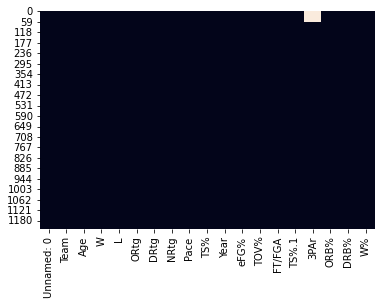

In [ ]:
# plotting heatmap of missing values to make sure there are no unexpected ones
sns.heatmap(total_nba.isnull(), cbar=False);
# the little block is a 3 pt shooting statistic before the implementation of the 3 pt line

In [ ]:
# need to fill empty 3pt statistics with 0
total_nba.fillna(0, inplace = True)

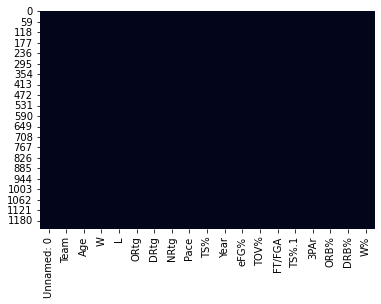

In [ ]:
# replotting to confirm
sns.heatmap(total_nba.isnull(), cbar=False);

In [ ]:
# Next, we need to take out the two redundant rows

In [ ]:
# for spelling
total_nba.columns

Index(['Unnamed: 0', 'Team', 'Age', 'W', 'L', 'ORtg', 'DRtg', 'NRtg', 'Pace',
       'TS%', 'Year', 'eFG%', 'TOV%', 'FT/FGA', 'TS%.1', '3PAr', 'ORB%',
       'DRB%', 'W%'],
      dtype='object')

In [ ]:
total_nba.drop(columns = ['Unnamed: 0', 'TS%.1'], inplace = True)

In [ ]:
# renaming columns to make a more readable dataframe and have more useful graphs
# also changing some to snake casing to maintain convention

In [ ]:
rename_col = {'Team':'team', 'Age':'age', 'W':'win', 'L':'loss', 'ORtg':'offensive_rtg', 'DRtg':'defensive_rtg', 'NRtg':'net_rtg', 'Pace':'pace', 'TS%':'true_shooting%', 
              'Year':'year', 'eFG%':'eff_fg%', 'TOV%':'turnover%', 'FT/FGA':'ft_per_fga', '3PAr':'3pt_attempt_rate', 'ORB%':'off_reb%', 'DRB%':'def_reb%', 'W%':'win%'}
total_nba.rename(columns=rename_col, inplace=True)
total_nba.columns

Index(['win', 'loss', 'team', 'age', 'offensive_rtg', 'defensive_rtg',
       'net_rtg', 'pace', 'true_shooting%', 'year', 'eff_fg%', 'turnover%',
       'ft_per_fga', '3pt_attempt_rate', 'off_reb%', 'def_reb%', 'win%'],
      dtype='object')

In [ ]:
#total_nba['win'] = total_nba['W']
#total_nba['loss'] = total_nba['L']
#total_nba['team'] = total_nba['Team']
#total_nba['age'] = total_nba['Age']
#total_nba['offensive_rtg'] = total_nba['ORtg']
#total_nba['defensive_rtg'] = total_nba['DRtg']
#total_nba['net_rtg'] = total_nba['NRtg']
#total_nba['pace'] = total_nba['Pace']
#total_nba['true_shooting%'] = total_nba['TS%']
#total_nba['year'] = total_nba['Year']
#total_nba['eff_fg%'] = total_nba['eFG%']
#total_nba['turnover%'] = total_nba['TOV%']
#total_nba['ft_per_fga'] = total_nba['FT/FGA']
#total_nba['3pt_attempt_rate'] = total_nba['3PAr']
#total_nba['off_reb%'] = total_nba['ORB%']
#total_nba['def_reb%'] = total_nba['DRB%']
#total_nba['win%'] = total_nba['W%']

In [ ]:
#total_nba.columns

Index(['Team', 'Age', 'W', 'L', 'ORtg', 'DRtg', 'NRtg', 'Pace', 'TS%', 'Year',
       'eFG%', 'TOV%', 'FT/FGA', '3PAr', 'ORB%', 'DRB%', 'W%', 'win', 'loss',
       'team', 'age', 'offensive_rtg', 'defensive_rtg', 'net_rtg', 'pace',
       'true_shooting%', 'year', 'eff_fg%', 'turnover%', 'ft_per_fga',
       '3pt_attempt_rate', 'off_reb%', 'def_reb%', 'win%'],
      dtype='object')

In [ ]:
# total_nba.drop(columns = ['Team', 'Age', 'W', 'L', 'ORtg', 'DRtg', 'NRtg', 'Pace', 'TS%', 'Year','eFG%', 'TOV%', 'FT/FGA', '3PAr', 'ORB%', 'DRB%', 'W%'], inplace = True)
# dropping redundant columns

In [ ]:
# good to go!
total_nba.head()

,win,loss,team,age,offensive_rtg,defensive_rtg,net_rtg,pace,true_shooting%,year,eff_fg%,turnover%,ft_per_fga,3pt_attempt_rate,off_reb%,def_reb%,win%
0,50.0,32.0,Denver Nuggets*,27.3,100.7,96.1,4.6,111.2,0.531,1976.0,0.481,18.8,0.275,0.0,34.2,68.0,0.609756
1,50.0,32.0,Philadelphia 76ers*,25.6,101.2,97.6,3.6,108.3,0.530,1976.0,0.480,18.3,0.275,0.0,34.6,66.0,0.609756
2,46.0,36.0,Golden State Warriors*,25.8,102.4,99.5,2.9,107.8,0.518,1976.0,0.475,15.6,0.211,0.0,33.0,67.8,0.560976
3,53.0,29.0,Los Angeles Lakers*,27.2,101.4,98.9,2.5,104.7,0.515,1976.0,0.478,15.3,0.188,0.0,31.0,66.1,0.646341
4,49.0,33.0,Houston Rockets*,25.8,104.5,102.9,1.6,101.3,0.529,1976.0,0.483,16.2,0.226,0.0,36.0,70.1,0.597561


### Definition of columns

To give an overview of the data that we're working with, we want to define each column that we'll use throughout the project:

win = number of wins in a season

 loss = number of losses in a season 

offensive_rtg = offensive rating, the number of points scored per 100 possesions

defensive_rtg = defensive rating, the number of points scored by opponents per 100 possesions

**net_rtg = net rating, the offensive rating - the defensive rating**

pace = The number of possesions per 48 minutes

true_shooting% = True Shooting Percentage, the formula is total points/2(FGA + .44FTA)

year = The year in which the season began

eff_fg% = effective field goal percentage, the formula is (FG + 0.5 * 3P) / FGA 

turnover% = turnover percentage, the percent of offensive possesions ending in a turnover

ft_per_fg = free throws per field goal attempts

off_reb% = an estimate of the percentage of available offensive rebounds a team grabbed

def_reb% = an estimate of the percentage of available defensive rebounds a team grabbed

win% = Wins/total games played

These columns will be referenced throughout and you will be able to refer back to here when needed

## Visualization/Exploration of our Dataset

Going into visualizing our data set and looking into trends

In [ ]:
total_nba.columns

Index(['win', 'loss', 'team', 'age', 'offensive_rtg', 'defensive_rtg',
       'net_rtg', 'pace', 'true_shooting%', 'year', 'eff_fg%', 'turnover%',
       'ft_per_fga', '3pt_attempt_rate', 'off_reb%', 'def_reb%', 'win%'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


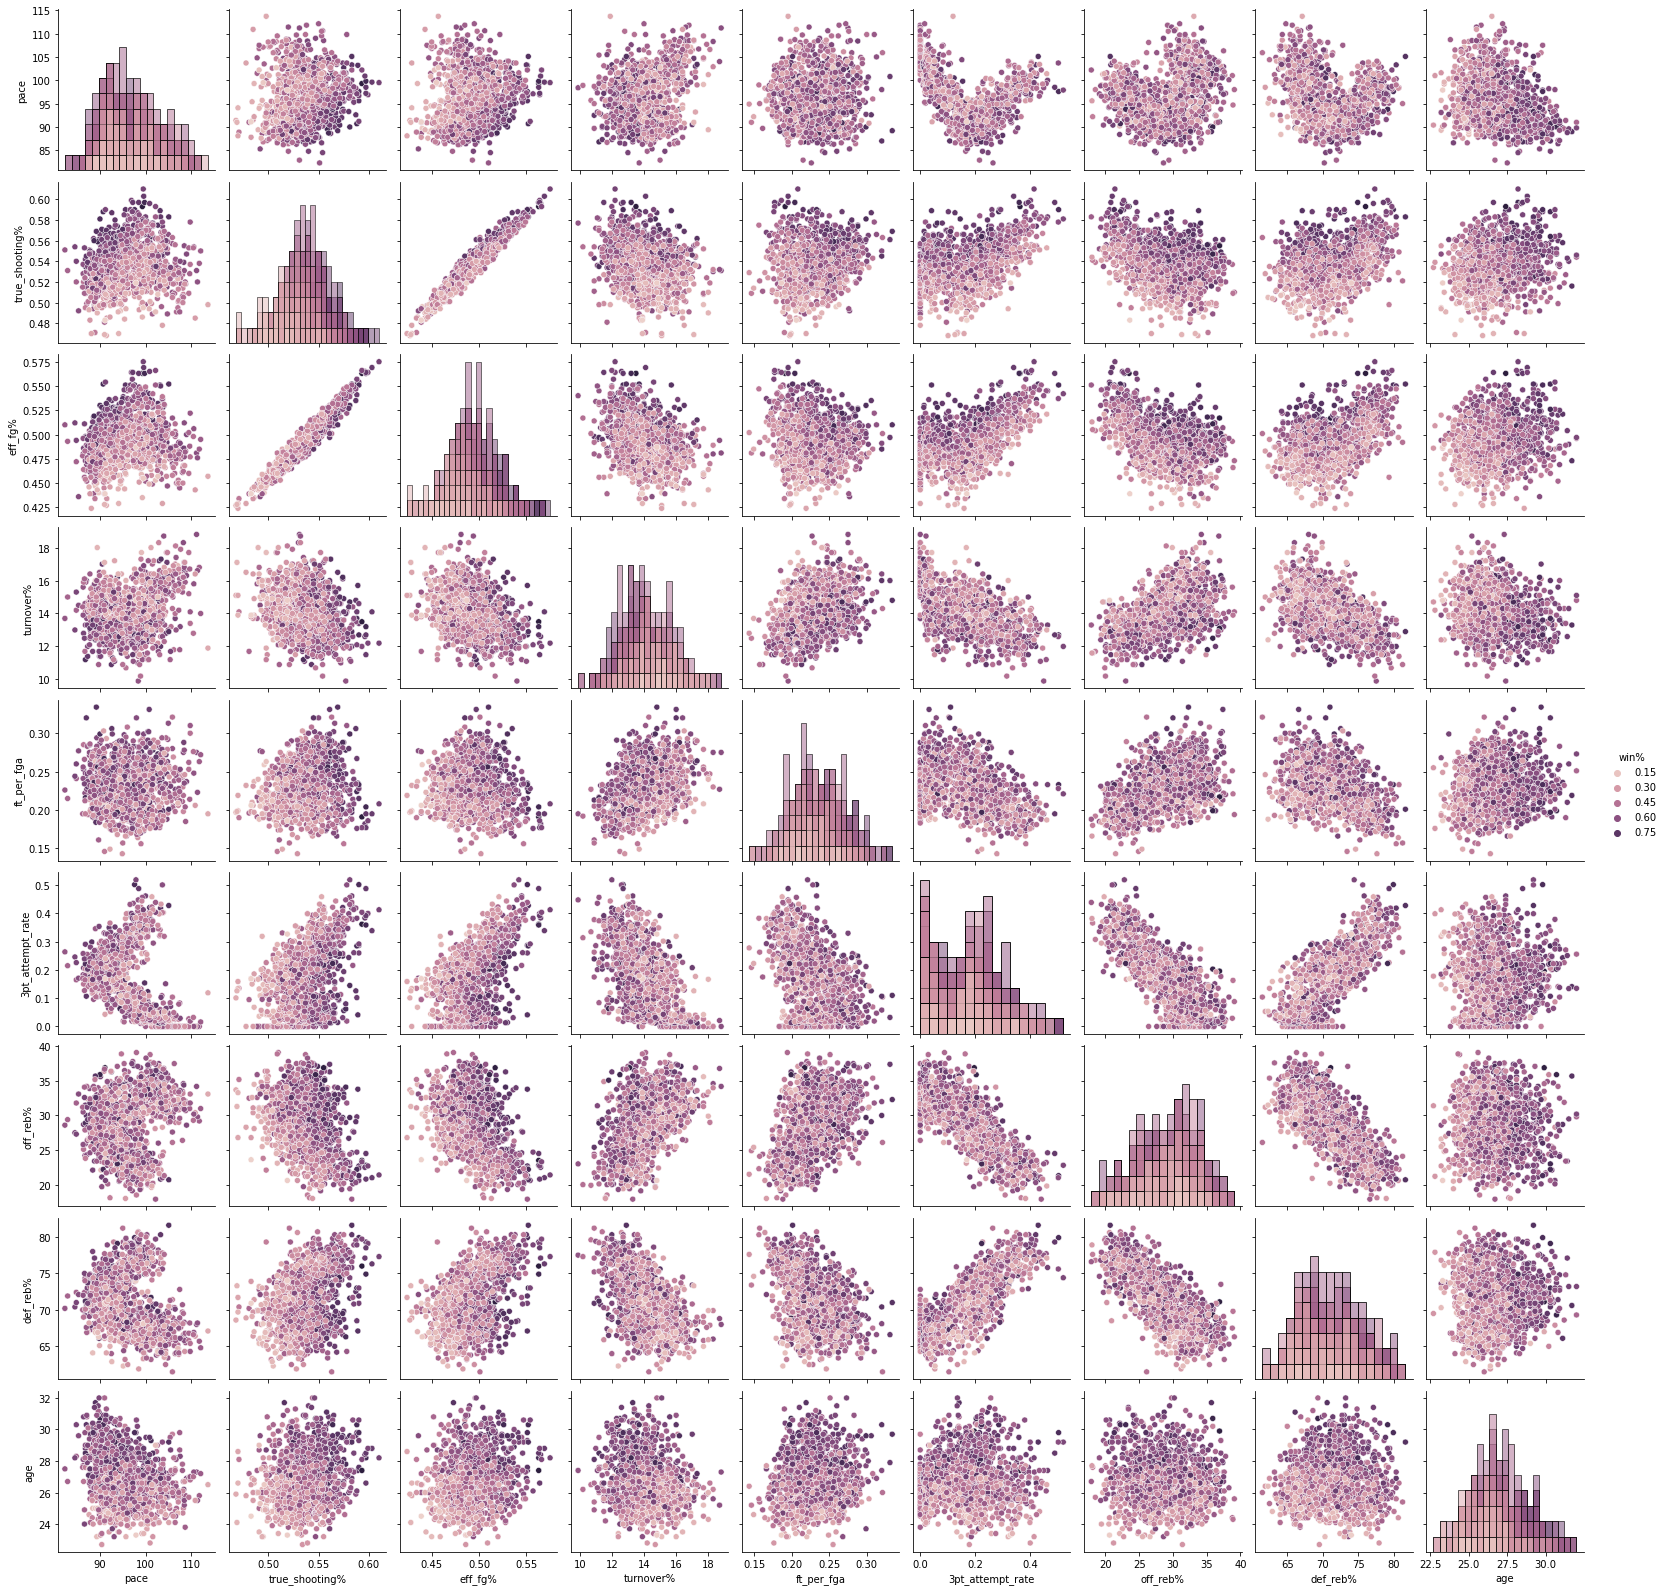

In [ ]:
### We are starting with a pair plot that is color coded by win%
# picking a selection of columns that does well to generally capture the most meaningful variables within our dataset
num_cols = ['pace', 'true_shooting%','eff_fg%', 'turnover%','ft_per_fga', '3pt_attempt_rate', 'off_reb%', 'def_reb%', 'age']
select_df = total_nba[num_cols]
# using w% as a hue to visualize 3rd demension correlation to winning
# we used this as a numerical color coding to represent the gradients of in-between teams, rather than a binary or categorical coding
# that would loose some of the nuance within win%
cat_col = 'win%'
select_df[cat_col] = total_nba[cat_col]
# color coded scatter plot matrix
sns.pairplot(select_df, hue=cat_col, diag_kind="hist");

A note: the extremely high levels of correlation between True Shooting% and Effective FG% is because they are most basically trying to measure the same thing: how well is a team shooting adjusted by the value and difficulty of the shots they're taking.

In [ ]:
### Next, we'll attempt to highlight some interesting relationships

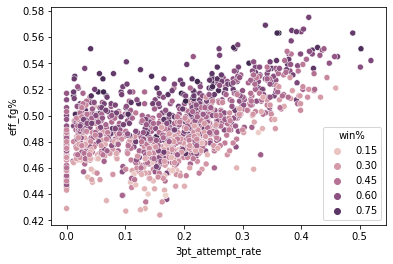

In [ ]:
sns.scatterplot(data = total_nba, y = 'eff_fg%', x = '3pt_attempt_rate', hue = 'win%');

In the above plot, we see that, most generally, the teams that are taking a high percentage of 3 pointers and also shoot at a high level of effective fg% are winning a lot of games - this is representative of the phenomenon that we mentioned with Steph Curry getting paid remarkable amounts of money.

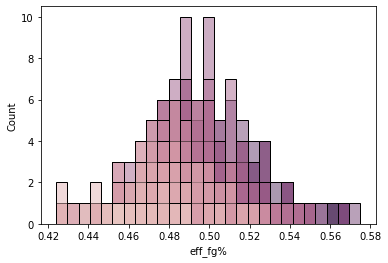

In [ ]:
sns.histplot(data = total_nba, x = 'eff_fg%', hue = 'win%', cbar=True, legend= False);

The above histogram once again highlights the important of effective field goal percentage, with the cluster of high win percentage teams shooting at least 50% effective FG%.

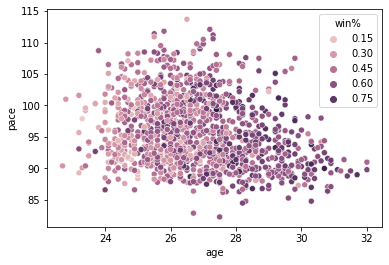

In [ ]:
sns.scatterplot(data = total_nba, x = 'age', y = 'pace', hue = 'win%');

The above graph illustrates what is a very interesting relationship between average age of a team, the pace this team plays at, and the rate at which they win. As obeys most popular conventions, the age is negatively correlated with pace, and the younger teams are more likely to play quickly with many possesions. What is very interesting is that the older, slower teams are also the teams that tend to win more games. This speaks to the value of adding veteran players on winning teams that add experience, expertise, and winning.

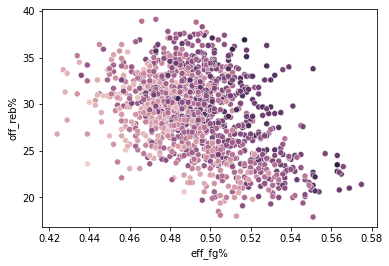

In [ ]:
sns.scatterplot(data = total_nba, x = 'eff_fg%', y = 'off_reb%', hue = 'win%', legend = False);

An interesting relationship that we hadn't before considered is pictured above, with win% relating strongly to a high combination of offensive rebound % and effective field goal %. This relationship could perhaps represent the balance of factors that a team has, with strong inside presence that collects high levels of offensive rebounds alongside good shot selection and high percentage shooters that contribute to high effective FG%.

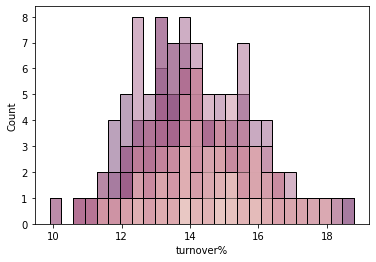

In [ ]:
sns.histplot(data = total_nba, x = 'turnover%', hue = 'win%', legend = False);

The last interesting plot that we'll show is the relationship between turnover% and win%. As we can see, the vast majority of high win percentage teams are clustered in the low turnover% regions. However, this is not without exception and not all low turnover% teams are high win%. In most conventional coaching and broadcasting, turnovers are seen as a very high importance statistic that is often means for benching in the coaching realm. However, this shows that, while most good to great teams have few turnovers, it is not enough on its own to win, presenting the question of evaluating passes and decision-making on long-term risk-reward analysis, rather than aiming only for safety.

### Next, Pricipal Componant Analysis

In [ ]:
total_nba.columns

Index(['win', 'loss', 'team', 'age', 'offensive_rtg', 'defensive_rtg',
       'net_rtg', 'pace', 'true_shooting%', 'year', 'eff_fg%', 'turnover%',
       'ft_per_fga', '3pt_attempt_rate', 'off_reb%', 'def_reb%', 'win%'],
      dtype='object')

In [ ]:
all_num_cols = ['age', 'pace', 'true_shooting%', 'eff_fg%', 'turnover%', 'ft_per_fga', '3pt_attempt_rate', 'off_reb%', 'def_reb%']
num_df = total_nba[all_num_cols]

In [ ]:
# creating a normalized dataframe for pca analysis

In [ ]:
normal_df = total_nba[all_num_cols]
normal_df = (normal_df - normal_df.mean()) / normal_df.std()
num_df = normal_df

In [ ]:
from sklearn.decomposition import PCA
# Choosing the first 3 as they represent a very high percentage of variance
pca = PCA(n_components = 3) 
your_pca = pca.fit_transform(num_df) 

In [ ]:
print(pca.explained_variance_ratio_)
sum(pca.explained_variance_ratio_)

[0.43567118 0.19729908 0.14277744]


0.7757476930390125

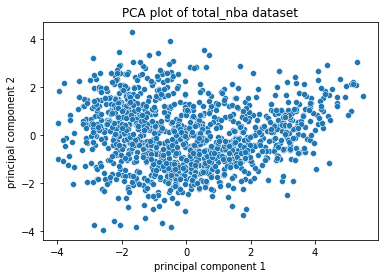

In [ ]:
sns.scatterplot(x=your_pca[:,0], y=your_pca[:,1])
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.title('PCA plot of total_nba dataset');

Highlighting some of the most extreme values:

In [ ]:
# Can't find many remarkable things about this team other than its low 3pt attempt rate and high pace
total_nba[your_pca[:,1]>4]

,win,loss,team,age,offensive_rtg,defensive_rtg,net_rtg,pace,true_shooting%,year,eff_fg%,turnover%,ft_per_fga,3pt_attempt_rate,off_reb%,def_reb%,win%
122,46.0,36.0,Denver Nuggets*,27.0,114.3,113.9,0.4,109.8,0.578,1981.0,0.522,14.1,0.31,0.019,31.8,64.3,0.560976


In [ ]:
# This team lost in last year's Finals and has a high win%, high net rating, and good shooting statistics
total_nba[your_pca[:,0]>5.3]

,win,loss,team,age,offensive_rtg,defensive_rtg,net_rtg,pace,true_shooting%,year,eff_fg%,turnover%,ft_per_fga,3pt_attempt_rate,off_reb%,def_reb%,win%
1198,51.0,21.0,Phoenix Suns*,26.6,117.2,111.3,5.9,97.2,0.597,2020.0,0.564,11.5,0.177,0.392,20.8,78.5,0.708333


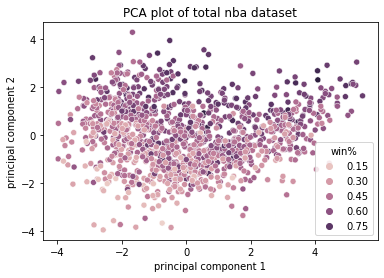

In [ ]:
cat_col = 'win%'
sns.scatterplot(x=your_pca[:,0], y=your_pca[:,1]
                ,hue=total_nba[cat_col])
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.title('PCA plot of total nba dataset');

As we can see, principal component 2 spreads the dataframe out generally by win%

### Clustering:

Next, we are going to look at K-Means Clustering for our DataSet

In [ ]:
# Choosing the majority of our numerical columns for clustering to create the most wholistic view of the data
cluster_cols = ['age', 'pace', 'true_shooting%', 'eff_fg%', 'turnover%', 'ft_per_fga', '3pt_attempt_rate', 'off_reb%', 'def_reb%']
df_cluster = total_nba[cluster_cols]

In [ ]:
df_cluster_stad = (df_cluster - df_cluster.mean()) / df_cluster.std()

In [ ]:
from sklearn import cluster
# the PCA chart showed 2 or 3 main clusters, so we're going with 3
your_kmeans = cluster.KMeans(n_clusters=3, random_state=2021).fit(df_cluster_stad)

In [ ]:
# labeling clusters
cluster_labeled_df = total_nba.copy()
cluster_labeled_df["k-means cluster"] = your_kmeans.labels_
# let's take a look at their labels
cluster_labeled_df

,win,loss,team,age,offensive_rtg,defensive_rtg,net_rtg,pace,true_shooting%,year,eff_fg%,turnover%,ft_per_fga,3pt_attempt_rate,off_reb%,def_reb%,win%,k-means cluster
0,50.0,32.0,Denver Nuggets*,27.3,100.7,96.1,4.6,111.2,0.531,1976.0,0.481,18.8,0.275,0.000,34.2,68.0,0.609756,1
1,50.0,32.0,Philadelphia 76ers*,25.6,101.2,97.6,3.6,108.3,0.530,1976.0,0.480,18.3,0.275,0.000,34.6,66.0,0.609756,1
2,46.0,36.0,Golden State Warriors*,25.8,102.4,99.5,2.9,107.8,0.518,1976.0,0.475,15.6,0.211,0.000,33.0,67.8,0.560976,1
3,53.0,29.0,Los Angeles Lakers*,27.2,101.4,98.9,2.5,104.7,0.515,1976.0,0.478,15.3,0.188,0.000,31.0,66.1,0.646341,1
4,49.0,33.0,Houston Rockets*,25.8,104.5,102.9,1.6,101.3,0.529,1976.0,0.483,16.2,0.226,0.000,36.0,70.1,0.597561,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,23.0,49.0,Minnesota Timberwolves,23.2,109.5,115.0,-5.5,101.6,0.555,2020.0,0.520,12.4,0.193,0.413,22.7,76.8,0.319444,0
1222,17.0,55.0,Houston Rockets,26.5,107.1,114.9,-7.8,101.4,0.553,2020.0,0.521,13.0,0.187,0.459,19.8,77.1,0.236111,0
1223,22.0,50.0,Cleveland Cavaliers,24.0,105.8,114.4,-8.6,97.3,0.543,2020.0,0.508,13.9,0.194,0.347,23.6,76.6,0.305556,0
1224,21.0,51.0,Orlando Magic,25.6,105.1,114.5,-9.4,98.7,0.527,2020.0,0.490,11.5,0.186,0.356,21.6,78.2,0.291667,0


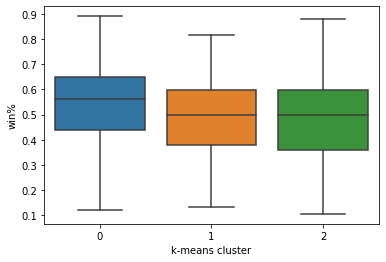

In [ ]:
# looking at the differences in win%
sns.boxplot(x='k-means cluster', y='win%', data=cluster_labeled_df);
# interestingly, very small deviations in the win percentage amoung the clusters, though the average for cluster one is slightly higher

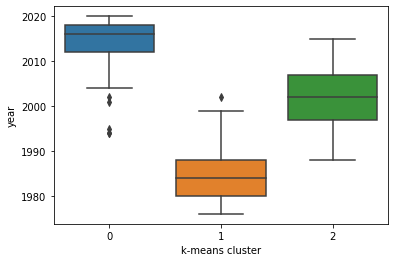

In [ ]:
# looking at the differences in year
sns.boxplot(x='k-means cluster', y='year', data=cluster_labeled_df);
# this is a lage difference is cluster to cluster, with cluster zero largly being the modern era, cluster 1 being the earliest era, 
# and cluster 2 being the late 90s, early 2000s

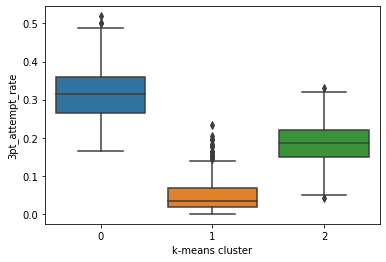

In [ ]:
# looking at the differences in 3pt attempt rate
sns.boxplot(x='k-means cluster', y='3pt_attempt_rate', data=cluster_labeled_df);
# this is another large source of differences amoung the clusters

Our clusters largely illustrated the variablity in statistics among eras, however, it had little help in showing differences in win%, as we hoped it would.

## Modeling

For modeling our dataset, we want to create the most accurate regression model possible that predicts win percentage from our given statistics

In [ ]:
### We will start with a KNN Regression model with one variable

In [ ]:
reg_feature = 'eff_fg%'
response = 'win%'
X = total_nba[[reg_feature]]
y = total_nba[response]
# effective fg% has been the most impactful single variable throughout, so this is what we will use for single-variable regression

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2021)

In [ ]:
from sklearn import neighbors
# n_neighbors is the hyperparameter of your knn model
# for now, pick a random number to test
knn_reg = neighbors.KNeighborsRegressor(n_neighbors= 60)
your_knn_reg = knn_reg.fit(X_train, y_train)

In [ ]:
# make prediction on both training and testing feature matrix
y_train_hat = your_knn_reg.predict(X_train)
y_test_hat = your_knn_reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error as mse
print("Training RMSE:", np.sqrt(mse(y_train, y_train_hat)))
print("Testing RMSE:", np.sqrt(mse(y_test, y_test_hat)))

Training RMSE: 0.12869179522491156
Testing RMSE: 0.13361438126930858


In [ ]:
# Making a quick loop to find K with lowest testing RMSE
rmse_list = []
for i in np.arange(2, 120):
  knn_reg = neighbors.KNeighborsRegressor(n_neighbors= i)
  your_knn_reg = knn_reg.fit(X_train, y_train)

  y_train_hat = your_knn_reg.predict(X_train)
  y_test_hat = your_knn_reg.predict(X_test)

  rmse_list.append({i:np.sqrt(mse(y_test, y_test_hat))})

In [ ]:
# identifying the lowest rmse within the list so that we don't just need to look through 120 observations
lowest_rmse = [1,1]

for pair in rmse_list:
  rmse = list(pair.values())
  i = list(pair.keys())
  if rmse[0] < lowest_rmse[0]:
    lowest_rmse = [rmse[0],i[0]]
print('Lowest RMSE K value = ' + str(lowest_rmse[1]))
print('-------------')
lowest_rmse

Lowest RMSE K value = 29
-------------


[0.1314338486199204, 29]

We see that K = 29 does the best job in fitting our data

Next, we'll illustrate our regression with K = 29

In [ ]:
K = 29

In [ ]:
your_df = total_nba
knn_reg = neighbors.KNeighborsRegressor(n_neighbors=K)
your_knn_reg_final = knn_reg.fit(X, y)

In [ ]:
step = (max(your_df[reg_feature]) - min(your_df[reg_feature]))/100
X_min = min(your_df[reg_feature]) - step
X_max = max(your_df[reg_feature]) + step

In [ ]:
# make up some X values to predict
# we pretend this is the new X value which we do not know the corresponding y
# this is for visualization only
step = (max(your_df[reg_feature]) - min(your_df[reg_feature]))/100
X_min = min(your_df[reg_feature]) - step
X_max = max(your_df[reg_feature]) + step

# pick a step to create a sequence of feature X values
# this depends on the scale of X
X_plot = np.arange(X_min, X_max, step) # this is a 1-d array
# reshape into a feature matrix with one column 
X_plot = X_plot.reshape((len(X_plot), 1))
y_plot = your_knn_reg_final.predict(X_plot)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


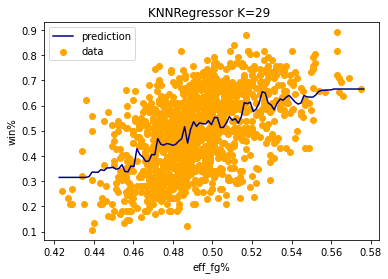

In [ ]:
plt.scatter(X, y, color='orange', label='data')
plt.plot(X_plot, y_plot, color='navy', label='prediction')
plt.axis('tight')
plt.xlabel(reg_feature)
plt.ylabel(response)
plt.legend()
plt.title('KNNRegressor K=%i '% K);

As we can see, there's a wide range of observations that tracks around our regression line, and an RMSE of around 13% is certainly a lot of error introduced. However, this is to be expected with a single variable regression, and this regression line does well to model the general direction and trend of our data.



---



---



Next, we'll look at multivariable linear regression

In [ ]:
total_nba.columns

Index(['win', 'loss', 'team', 'age', 'offensive_rtg', 'defensive_rtg',
       'net_rtg', 'pace', 'true_shooting%', 'year', 'eff_fg%', 'turnover%',
       'ft_per_fga', '3pt_attempt_rate', 'off_reb%', 'def_reb%', 'win%'],
      dtype='object')

In [ ]:
# dropping columns that don't make sense to be in the regression
drop = ['win', 'loss', 'team', 'age', 'offensive_rtg', 'defensive_rtg','net_rtg','win%', 'year']
# response will again be win%
response = 'win%'

In [ ]:
X_full = your_df.drop(columns=drop)
y = your_df[response]

In [ ]:
X_full.head()

,pace,true_shooting%,eff_fg%,turnover%,ft_per_fga,3pt_attempt_rate,off_reb%,def_reb%
0,111.2,0.531,0.481,18.8,0.275,0.0,34.2,68.0
1,108.3,0.530,0.480,18.3,0.275,0.0,34.6,66.0
2,107.8,0.518,0.475,15.6,0.211,0.0,33.0,67.8
3,104.7,0.515,0.478,15.3,0.188,0.0,31.0,66.1
4,101.3,0.529,0.483,16.2,0.226,0.0,36.0,70.1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.25, random_state=2021)

In [ ]:
from sklearn.linear_model import LinearRegression
ls_model = LinearRegression(fit_intercept=True)
ls_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# printing out model coefficiently with labels
pd.Series(ls_model.coef_, index=X_full.columns)

pace               -0.006863
true_shooting%      0.863473
eff_fg%             4.132866
turnover%          -0.022636
ft_per_fga          0.605600
3pt_attempt_rate   -0.571463
off_reb%            0.014307
def_reb%            0.014206
dtype: float64

To interpret these coefficients, we see that, all else being equal, the marginal increase in the given variable yields a change in win% equal to the given coefficient.

In [ ]:
# model.predict on both training and testing
y_train_hat = ls_model.predict(X_train)
y_test_hat = ls_model.predict(X_test)

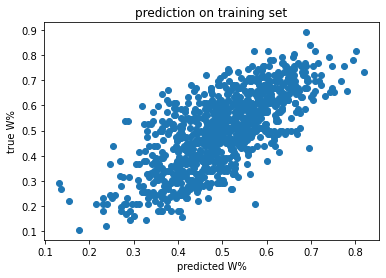

In [ ]:
# plot predicted vs. true label on training
plt.scatter(x=y_train_hat, y=y_train)
plt.xlabel("predicted W%")
plt.ylabel("true W%")
plt.title("prediction on training set");

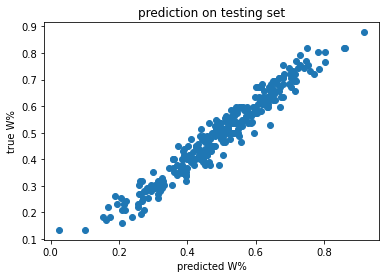

In [ ]:
# plot predicted vs. true label on testing
plt.scatter(x=y_test_hat, y=y_test)
plt.xlabel("predicted W%")
plt.ylabel("true W%")
plt.title("prediction on testing set");

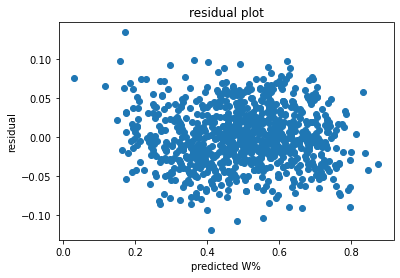

In [ ]:
# residuals plot
residual = y_train - y_train_hat
plt.scatter(x=y_train_hat, y=residual)
plt.xlabel("predicted W%")
plt.ylabel("residual")
plt.title("residual plot");

In [ ]:
from sklearn.metrics import mean_squared_error as mse
print("Training RMSE:", np.sqrt(mse(y_train, y_train_hat)))
print("Testing RMSE:", np.sqrt(mse(y_test, y_test_hat)))

Training RMSE: 0.03760246163399065
Testing RMSE: 0.03652570089867753




---



---



Random Forest Regression

In [ ]:
# dropping columns that don't make sense to be in the regression
drop = ['win', 'loss', 'team', 'age', 'offensive_rtg', 'defensive_rtg','net_rtg','win%']
# response will again be win%
response = 'win%'

In [ ]:
X = your_df.drop(columns=drop)
y = your_df[response]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2021)

In [ ]:
# Using 1000 trees because we saw greatly diminishing returns to adding trees with a much slower runtime
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=1000)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000)

In [ ]:
y_test_rf_hat = rf_model.predict(X_test)

In [ ]:
# compare RMSE on testing set for the three models
from sklearn.metrics import mean_squared_error as mse
print("KNN Model Testing RMSE:", lowest_rmse[0])
print("Linear Model Testing RMSE:", np.sqrt(mse(y_test, y_test_hat)))
print("Random Forest Testing RMSE:", np.sqrt(mse(y_test, y_test_rf_hat)))

KNN Model Testing RMSE: 0.1314338486199204
Linear Model Testing RMSE: 0.11013068187257896
Random Forest Testing RMSE: 0.0995573458097791


As we can see, we were able to reach our lowest RMSE on the random forest model

In [ ]:
# saving these RMSEs for later
knn_rmse = lowest_rmse[0]
lin_rmse = np.sqrt(mse(y_test, y_test_hat))
rf_rmse = np.sqrt(mse(y_test, y_test_rf_hat))

## Results

Through our visualizations, analysis, and modeling, we were able to discover baseline answers to the questions that we set out to analyze.

*Which Advanced Statistics Matter Most for Winning?*

As we can see, a general trend throughout the entire project has been the influence of shooting statistics on winning percentage. In our initial visualizations, the effective FG% proved to be far and away the most influential on winning. Later, in our linear regression model, we can see that effective FG% has the largest coefficient by far, meaning that, with everything else the same, an increase in effective FG% creates the largest positive impact on winning. After effective FG%, the next most influencial statistic is true shooting %, a very similar statistic. Beyond these two, the remaining statistics have very little influence or correlation with winning percentage. Certainly, we were very limited in the number of statistics we analyzed, but amoung those we did analyze, the shooting statistics were certianly the most influencial.

*What is the Most Accurate Model for Predicting Win% that we can Create?*

The modeling portion of our notebook covers how accurately we can predict win percentage based off of the statistics that we analyzed and took from Basketball-Reference. Starting off with our univariate KNN analysis using effective FG%, we were able to predict win% of teams with an RMSE of 13.14% from the correct measurement. Using only one variable, the relative small size of this measure speaks again to the influence of efficient shooting on winning. Next, we improved the RMSE further by adding the rest of our variables and completing a linear regression with them all together. Doing this, we lowered the RMSE to 10.27%, meaning our predictions were, on average, around 10.3% away from the correct statistic. Lastly, we finished by creating a random forest regression using the same variables as our linear regression. Using this method, we were able to further lower the RMSE even further to about 9.98%. This means that, when we use the random forest model, we are able to predict win% within around 9.98% accurancy. This means that the most accurate model that we were able to create was the random forest regression model using our numerical variables. Although this measure isn't very low, using only a few statistics, we were able to relatively accurately predict win percentage. Below, we have printed out the RMSEs from each of our three respective models.

In [ ]:
print('Univariate K Nearest Neighbor Regression RMSE:',knn_rmse)
print('Multi-variate Linear Regression RMSE:',lin_rmse)
print('Random Forest Regression RMSE:', rf_rmse)

Univariate K Nearest Neighbor Regression RMSE: 0.1314338486199204
Multi-variate Linear Regression RMSE: 0.11013068187257896
Random Forest Regression RMSE: 0.0995573458097791


## Implications and Impacts

*Implications*

From our project, we have derived two major implications from the answers to our two questions. The two major implications are as follows:

1.   Shooting is the most valuable offensive statistic.
2.   Complex models with many inputs could predict wins to a very high accuracy.



1. Throughout the project, and in every aspect of visualization, analysis, and modeling, we found that effective FG% has the highest correlation to winning. 

2. In our relatively simplistic dataset of statistics, we were able to predict win percentage with less than ten percent error. With the NBA adding so many statistics with aspects such as player tracking and more, similarly advanced models that incorporate more statistics could predict wins to a very high accuracy.

*Impact*

Along with our implications, we have two major impacts that follow the relative implications.

*First,* our major impact of finding that shooting is so important follows the recent trend of contracts in the NBA, this being that players who shoot high volumes at high efficiency are the most valuable and deserve to be paid the most money.

*Second,* with the formation of the model we created, as well as the implication of higher level models with more inputs, we believe that a major impact could be the continued study and pursuit of models that predict season wins and individual game results to a high level. With our low level model predicting to a high accuracy, we predict that high level models have the potential to predict at even higher levels of accuracy. This could out-predict betting models and make large amounts of money.